# Comparación de Librerías de Visualización en Python

**Análisis Comparativo: Matplotlib, Seaborn y Plotly**

## Objetivo

Este notebook presenta un análisis exhaustivo de tres librerías fundamentales para visualización de datos en Python:

1. **Matplotlib** - La librería base para visualizaciones estáticas
2. **Seaborn** - Librería estadística de alto nivel basada en Matplotlib
3. **Plotly** - Librería para visualizaciones interactivas y dashboards

Para cada librería se evaluarán:
- Características principales
- Ventajas y desventajas
- Escenarios de uso recomendados
- Ejemplos prácticos con el mismo conjunto de datos

---

## 1. Instalación y Configuración

Antes de comenzar, asegurarse de tener instaladas las librerías necesarias:

```bash
pip install matplotlib seaborn plotly pandas numpy
```

In [12]:
# Importación de librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly

# Configuración general
import warnings
warnings.filterwarnings('ignore')

# Configuración de estilo para matplotlib
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Verificar versiones
print(f"Matplotlib versión: {plt.matplotlib.__version__}")
print(f"Seaborn versión: {sns.__version__}")
print(f"Plotly versión: {plotly.__version__}")
print(f"Pandas versión: {pd.__version__}")
print(f"NumPy versión: {np.__version__}")

Matplotlib versión: 3.9.0
Seaborn versión: 0.13.2
Plotly versión: 6.3.1
Pandas versión: 2.2.2
NumPy versión: 1.26.4


In [13]:
# Configuración de Plotly para Jupyter Notebooks en VS Code
import plotly.io as pio

# Configurar renderer apropiado para VS Code
pio.renderers.default = "plotly_mimetype+notebook_connected"

# Alternativa: si lo anterior no funciona, descomentar la siguiente línea
# pio.renderers.default = "notebook_connected"

print("Configuración de Plotly completada para VS Code")
print(f"Renderer activo: {pio.renderers.default}")

Configuración de Plotly completada para VS Code
Renderer activo: plotly_mimetype+notebook_connected


## 2. Preparación de Datos

Para realizar una comparación justa, utilizaremos el mismo conjunto de datos en todas las visualizaciones. Crearemos un dataset sintético que simula datos de ventas y rendimiento de productos.

In [14]:
# Generar datos sintéticos reproducibles
np.random.seed(42)

# Crear dataset de ventas de productos
n_samples = 200
categorias = ['Electrónica', 'Ropa', 'Alimentos', 'Hogar', 'Deportes']
meses = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']

data = {
    'Producto': [f'Producto_{i}' for i in range(1, n_samples + 1)],
    'Categoria': np.random.choice(categorias, n_samples),
    'Ventas': np.random.normal(5000, 2000, n_samples).clip(500, 15000),
    'Precio': np.random.normal(100, 50, n_samples).clip(10, 500),
    'Satisfaccion': np.random.normal(4.0, 0.8, n_samples).clip(1, 5),
    'Mes': np.random.choice(meses, n_samples),
    'Region': np.random.choice(['Norte', 'Sur', 'Este', 'Oeste'], n_samples)
}

df = pd.DataFrame(data)
df['Ingresos'] = df['Ventas'] * df['Precio']

# Crear dataset agregado por mes
ventas_mensuales = pd.DataFrame({
    'Mes': meses,
    'Ventas_Total': [np.random.normal(50000, 10000) for _ in meses],
    'Clientes': [np.random.randint(800, 1500) for _ in meses]
})

# Mostrar información del dataset
print("Dataset Principal:")
print(df.head(10))
print(f"\nDimensiones: {df.shape}")
print(f"\nEstadísticas descriptivas:")
print(df.describe())
print(f"\nDistribución por categoría:")
print(df['Categoria'].value_counts())

Dataset Principal:
      Producto  Categoria       Ventas      Precio  Satisfaccion  Mes Region  \
0   Producto_1      Hogar  4909.194689   57.337003      4.397263  Oct  Norte   
1   Producto_2   Deportes  5433.873452   99.285973      3.844599  Jun  Oeste   
2   Producto_3  Alimentos  6024.847465  110.095372      3.835009  Dic  Norte   
3   Producto_4   Deportes  6086.977382   59.763166      2.177640  Ago    Sur   
4   Producto_5   Deportes  5056.198927   27.967363      4.637987  Ene  Norte   
5   Producto_6       Ropa  2605.825873  113.465883      4.116163  Oct  Norte   
6   Producto_7  Alimentos  6579.345610  190.683329      5.000000  Ago    Sur   
7   Producto_8  Alimentos  5862.978927  120.229145      3.940394  Nov  Norte   
8   Producto_9  Alimentos  2806.495403  104.503629      4.453072  Jul  Oeste   
9  Producto_10   Deportes  3635.396872  104.136522      4.665455  Ene  Norte   

       Ingresos  
0  2.814785e+05  
1  5.395074e+05  
2  6.633078e+05  
3  3.637770e+05  
4  1.41408

---

## 3. Matplotlib: La Base de la Visualización en Python

### Descripción General

**Matplotlib** es la librería de visualización más fundamental en Python. Creada por John D. Hunter en 2003, ofrece control total sobre cada aspecto de una gráfica. Es la base sobre la cual se construyen otras librerías como Seaborn.

**Enlaces oficiales:**
- PyPI: https://pypi.org/project/matplotlib/
- Documentación: https://matplotlib.org/

### Ventajas

1. **Control granular**: Permite personalizar cada elemento de la visualización
2. **Ampliamente adoptada**: Estándar de facto en la comunidad científica
3. **Publicaciones académicas**: Ideal para generar gráficas de calidad para papers
4. **Flexibilidad**: Soporta múltiples backends y formatos de salida
5. **Integración**: Compatible con NumPy, Pandas y ecosistema científico

### Desventajas

1. **Sintaxis verbosa**: Requiere más código para lograr resultados simples
2. **Curva de aprendizaje**: API compleja con múltiples formas de hacer lo mismo
3. **Estética predeterminada**: Estilo visual menos moderno sin configuración
4. **No interactivo**: Principalmente para gráficas estáticas
5. **Configuración manual**: Necesita ajustes explícitos para muchos detalles

### Escenarios de Uso Recomendados

- Publicaciones científicas y académicas
- Reportes estáticos en PDF
- Control preciso sobre elementos visuales
- Integración con aplicaciones científicas
- Cuando se requiere máxima personalización

### Ejemplo 1: Gráfico de Dispersión con Matplotlib

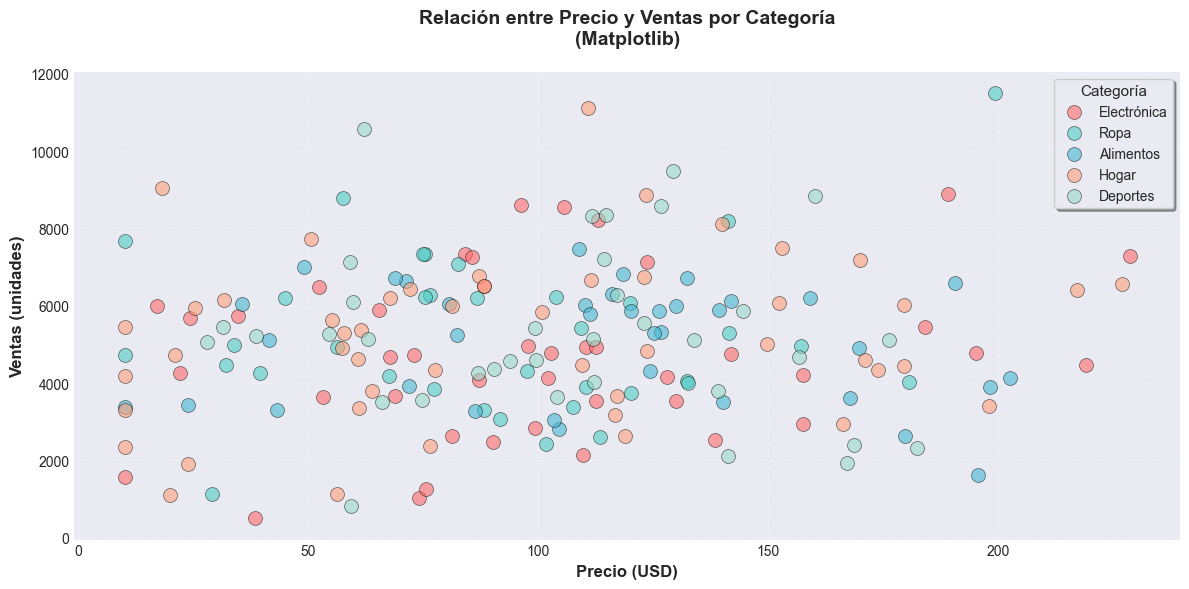

Observaciones:
- Control total sobre colores, tamaños y estilos
- Requiere configuración manual de cada elemento
- Resultado de alta calidad para publicaciones


In [15]:
# Gráfico de dispersión: Precio vs Ventas por Categoría
fig, ax = plt.subplots(figsize=(12, 6))

# Crear scatter plot por categoría
colors = {'Electrónica': '#FF6B6B', 'Ropa': '#4ECDC4', 
          'Alimentos': '#45B7D1', 'Hogar': '#FFA07A', 'Deportes': '#98D8C8'}

for categoria in categorias:
    data_cat = df[df['Categoria'] == categoria]
    ax.scatter(data_cat['Precio'], data_cat['Ventas'], 
              label=categoria, alpha=0.6, s=100, c=colors[categoria], edgecolors='black', linewidth=0.5)

# Personalización
ax.set_xlabel('Precio (USD)', fontsize=12, fontweight='bold')
ax.set_ylabel('Ventas (unidades)', fontsize=12, fontweight='bold')
ax.set_title('Relación entre Precio y Ventas por Categoría\n(Matplotlib)', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(title='Categoría', title_fontsize=11, fontsize=10, loc='upper right', frameon=True, shadow=True)
ax.grid(True, alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

print("Observaciones:")
print("- Control total sobre colores, tamaños y estilos")
print("- Requiere configuración manual de cada elemento")
print("- Resultado de alta calidad para publicaciones")

### Ejemplo 2: Gráfico de Barras y Líneas Combinado

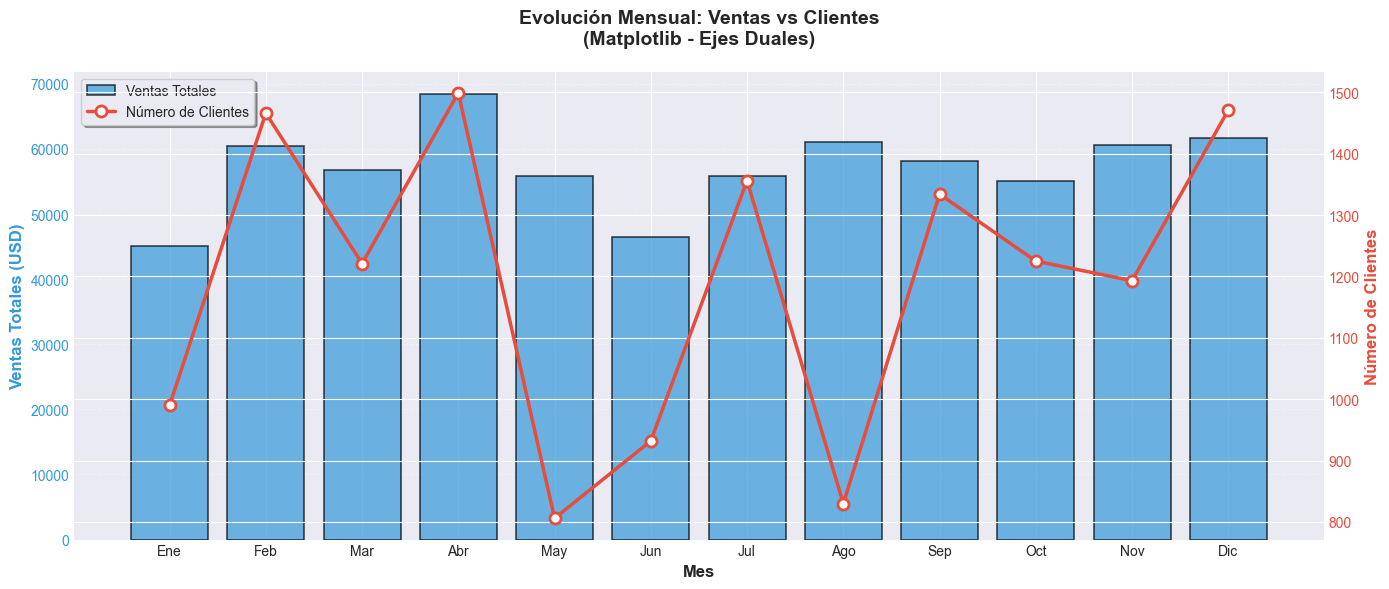

Ventajas demostradas:
- Control preciso sobre ejes duales
- Personalización completa de colores y estilos
- Ideal para reportes técnicos estáticos


In [16]:
# Gráfico dual: Ventas totales (barras) y número de clientes (línea)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Eje principal: Barras de ventas
color_barras = '#3498db'
ax1.bar(ventas_mensuales['Mes'], ventas_mensuales['Ventas_Total'], 
        color=color_barras, alpha=0.7, label='Ventas Totales', edgecolor='black', linewidth=1.2)
ax1.set_xlabel('Mes', fontsize=12, fontweight='bold')
ax1.set_ylabel('Ventas Totales (USD)', fontsize=12, fontweight='bold', color=color_barras)
ax1.tick_params(axis='y', labelcolor=color_barras)
ax1.grid(axis='y', alpha=0.3, linestyle='--')

# Eje secundario: Línea de clientes
ax2 = ax1.twinx()
color_linea = '#e74c3c'
ax2.plot(ventas_mensuales['Mes'], ventas_mensuales['Clientes'], 
         color=color_linea, marker='o', linewidth=2.5, markersize=8, 
         label='Número de Clientes', markerfacecolor='white', markeredgewidth=2)
ax2.set_ylabel('Número de Clientes', fontsize=12, fontweight='bold', color=color_linea)
ax2.tick_params(axis='y', labelcolor=color_linea)

# Título y leyendas
plt.title('Evolución Mensual: Ventas vs Clientes\n(Matplotlib - Ejes Duales)', 
          fontsize=14, fontweight='bold', pad=20)

# Combinar leyendas
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', frameon=True, shadow=True)

plt.tight_layout()
plt.show()

print("Ventajas demostradas:")
print("- Control preciso sobre ejes duales")
print("- Personalización completa de colores y estilos")
print("- Ideal para reportes técnicos estáticos")

---

## 4. Seaborn: Visualización Estadística de Alto Nivel

### Descripción General

**Seaborn** es una librería de visualización estadística construida sobre Matplotlib. Creada por Michael Waskom, simplifica la creación de gráficos estadísticos complejos con una sintaxis más concisa y estilos visuales modernos por defecto.

**Enlaces oficiales:**
- PyPI: https://pypi.org/project/seaborn/
- Documentación: https://seaborn.pydata.org/

### Ventajas

1. **Sintaxis concisa**: Menos código para gráficos complejos
2. **Integración con Pandas**: Trabaja directamente con DataFrames
3. **Estética moderna**: Paletas de colores y estilos atractivos por defecto
4. **Visualizaciones estadísticas**: Funciones especializadas (heatmaps, pairplots, violinplots)
5. **Configuración inteligente**: Ajusta automáticamente muchos aspectos visuales

### Desventajas

1. **Menor control**: Menos personalización que Matplotlib puro
2. **Dependencia de Matplotlib**: Requiere conocimientos de Matplotlib para personalizaciones avanzadas
3. **Rendimiento**: Puede ser más lento con datasets muy grandes
4. **No interactivo**: Limitado a visualizaciones estáticas
5. **Curva de aprendizaje**: Requiere entender conceptos estadísticos subyacentes

### Escenarios de Uso Recomendados

- Análisis exploratorio de datos (EDA)
- Visualización de distribuciones y relaciones estadísticas
- Informes ejecutivos con estética moderna
- Análisis de correlaciones y matrices
- Cuando se trabaja intensivamente con Pandas DataFrames

### Ejemplo 1: Gráfico de Dispersión con Seaborn (mismo dataset)

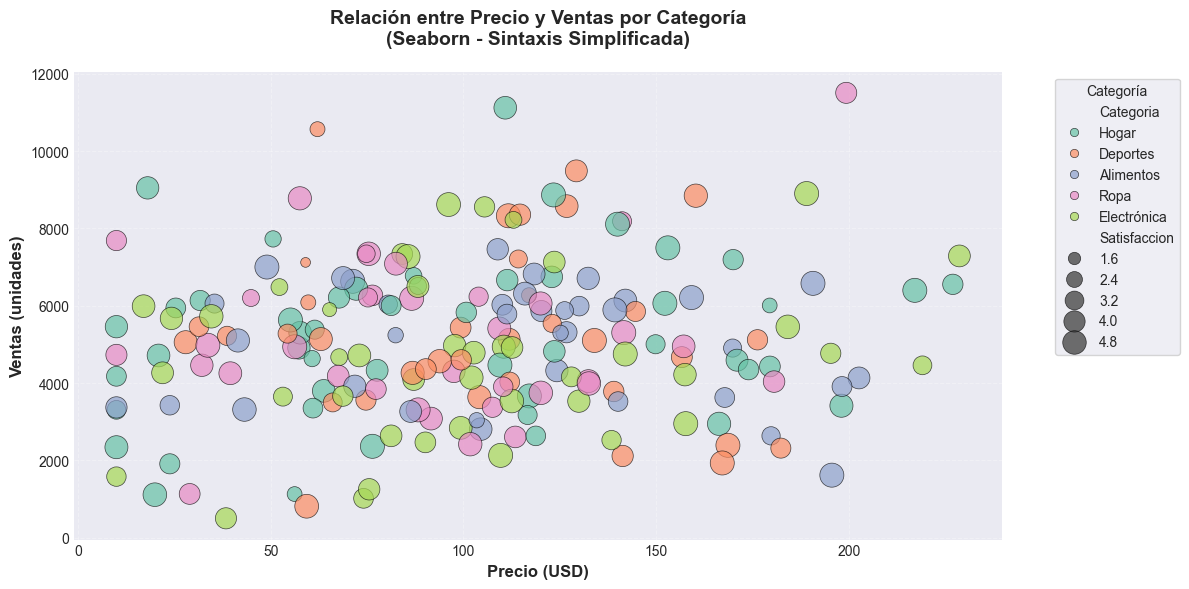

Comparación con Matplotlib:
- Código más conciso (una sola línea para el scatter)
- Integración directa con DataFrame
- Tamaño de puntos variable por 'Satisfaccion' automáticamente
- Paleta de colores moderna por defecto


In [17]:
# Mismo gráfico de dispersión pero con Seaborn
plt.figure(figsize=(12, 6))

sns.scatterplot(data=df, x='Precio', y='Ventas', hue='Categoria', 
                size='Satisfaccion', sizes=(50, 300), alpha=0.7, 
                palette='Set2', edgecolor='black', linewidth=0.5)

plt.title('Relación entre Precio y Ventas por Categoría\n(Seaborn - Sintaxis Simplificada)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Precio (USD)', fontsize=12, fontweight='bold')
plt.ylabel('Ventas (unidades)', fontsize=12, fontweight='bold')
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', frameon=True)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print("Comparación con Matplotlib:")
print("- Código más conciso (una sola línea para el scatter)")
print("- Integración directa con DataFrame")
print("- Tamaño de puntos variable por 'Satisfaccion' automáticamente")
print("- Paleta de colores moderna por defecto")

### Ejemplo 2: Análisis Estadístico Avanzado

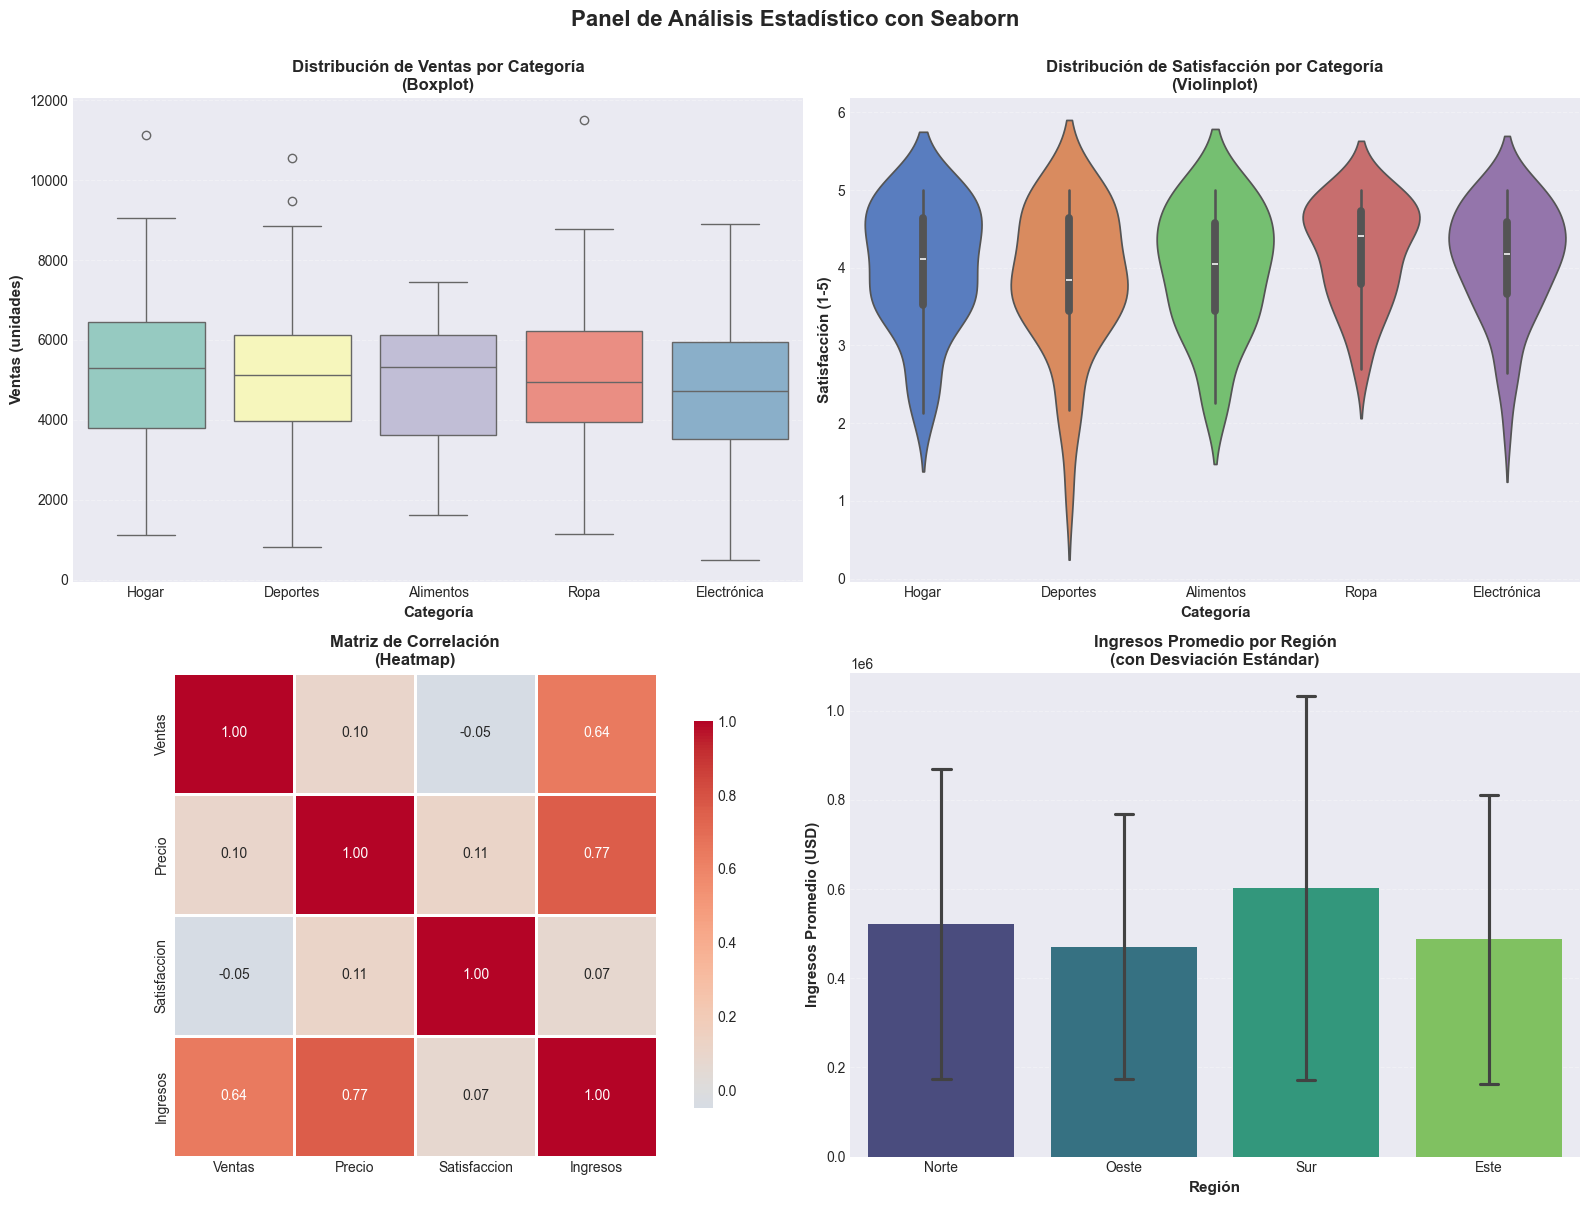

Capacidades estadísticas de Seaborn:
- Boxplot: muestra cuartiles, outliers y distribución
- Violinplot: combina boxplot con densidad (KDE)
- Heatmap: visualización de matrices con anotaciones automáticas
- Barplot: calcula estadísticas (media, std) automáticamente

Estas visualizaciones serían más complejas de crear en Matplotlib puro


In [18]:
# Visualización estadística compleja: Distribuciones por categoría
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Boxplot: Distribución de ventas por categoría
sns.boxplot(data=df, x='Categoria', y='Ventas', palette='Set3', ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Ventas por Categoría\n(Boxplot)', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Categoría', fontsize=11, fontweight='bold')
axes[0, 0].set_ylabel('Ventas (unidades)', fontsize=11, fontweight='bold')
axes[0, 0].grid(axis='y', alpha=0.3, linestyle='--')

# 2. Violinplot: Distribución de satisfacción por categoría
sns.violinplot(data=df, x='Categoria', y='Satisfaccion', palette='muted', ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Satisfacción por Categoría\n(Violinplot)', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Categoría', fontsize=11, fontweight='bold')
axes[0, 1].set_ylabel('Satisfacción (1-5)', fontsize=11, fontweight='bold')
axes[0, 1].grid(axis='y', alpha=0.3, linestyle='--')

# 3. Heatmap: Correlación entre variables numéricas
correlation_matrix = df[['Ventas', 'Precio', 'Satisfaccion', 'Ingresos']].corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8}, ax=axes[1, 0])
axes[1, 0].set_title('Matriz de Correlación\n(Heatmap)', fontsize=12, fontweight='bold')

# 4. Barplot: Promedio de ingresos por región
sns.barplot(data=df, x='Region', y='Ingresos', estimator=np.mean, 
            palette='viridis', ci='sd', capsize=0.1, ax=axes[1, 1])
axes[1, 1].set_title('Ingresos Promedio por Región\n(con Desviación Estándar)', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Región', fontsize=11, fontweight='bold')
axes[1, 1].set_ylabel('Ingresos Promedio (USD)', fontsize=11, fontweight='bold')
axes[1, 1].grid(axis='y', alpha=0.3, linestyle='--')

plt.suptitle('Panel de Análisis Estadístico con Seaborn', fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("Capacidades estadísticas de Seaborn:")
print("- Boxplot: muestra cuartiles, outliers y distribución")
print("- Violinplot: combina boxplot con densidad (KDE)")
print("- Heatmap: visualización de matrices con anotaciones automáticas")
print("- Barplot: calcula estadísticas (media, std) automáticamente")
print("\nEstas visualizaciones serían más complejas de crear en Matplotlib puro")

---

## 5. Plotly: Visualización Interactiva y Dashboards

### Descripción General

**Plotly** es una librería de visualización interactiva que genera gráficos basados en JavaScript (D3.js). Es ideal para dashboards web, presentaciones interactivas y aplicaciones donde el usuario necesita explorar los datos dinámicamente.

**Enlaces oficiales:**
- PyPI: https://pypi.org/project/plotly/
- Documentación: https://plotly.com/python/

### Ventajas

1. **Interactividad nativa**: Zoom, pan, tooltips, filtros sin código adicional
2. **Dashboards modernos**: Ideal para aplicaciones web con Dash
3. **Exportación flexible**: HTML standalone, imágenes estáticas, JSON
4. **Gráficos 3D**: Soporte robusto para visualizaciones tridimensionales
5. **Actualización en vivo**: Streaming de datos en tiempo real
6. **Aspecto profesional**: Estética moderna y empresarial por defecto

### Desventajas

1. **Tamaño de archivo**: HTML resultantes pueden ser pesados
2. **Dependencia de JavaScript**: Requiere navegador para visualización completa
3. **Curva de aprendizaje**: API diferente a Matplotlib/Seaborn
4. **Rendimiento**: Puede ser lento con datasets muy grandes (>10k puntos sin optimización)
5. **Personalización avanzada**: Algunos ajustes finos requieren conocer estructura JSON

### Escenarios de Uso Recomendados

- Dashboards interactivos y aplicaciones web
- Presentaciones ejecutivas con exploración de datos
- Visualizaciones 3D y mapas geográficos
- Reportes compartidos en HTML
- Análisis exploratorio con interacción directa
- Publicaciones online y blogs técnicos

### Ejemplo 1: Gráfico de Dispersión Interactivo (mismo dataset)

In [19]:
# Mismo gráfico de dispersión pero INTERACTIVO con Plotly
fig = px.scatter(df, x='Precio', y='Ventas', color='Categoria', 
                 size='Satisfaccion', hover_data=['Producto', 'Region', 'Ingresos'],
                 title='Relación entre Precio y Ventas por Categoría<br>(Plotly - Visualización Interactiva)',
                 labels={'Precio': 'Precio (USD)', 'Ventas': 'Ventas (unidades)'},
                 color_discrete_sequence=px.colors.qualitative.Set2,
                 size_max=20)

# Personalización
fig.update_traces(marker=dict(line=dict(width=0.5, color='DarkSlateGrey')))
fig.update_layout(
    font=dict(size=12),
    title_font=dict(size=16, family='Arial Black'),
    hovermode='closest',
    plot_bgcolor='rgba(240, 240, 240, 0.5)',
    legend=dict(title=dict(text='Categoría', font=dict(size=12, family='Arial Black')))
)

fig.show(renderer="notebook_connected")

print("Interactividad de Plotly:")
print("- Hover: muestra Producto, Región, Ingresos al pasar el mouse")
print("- Zoom: click y arrastrar para hacer zoom en áreas específicas")
print("- Pan: shift + arrastrar para desplazar")
print("- Leyenda: click para ocultar/mostrar categorías")
print("- Exportar: botón de cámara para guardar como PNG")
print("\nIdeal para: dashboards, presentaciones interactivas, reportes HTML")

Interactividad de Plotly:
- Hover: muestra Producto, Región, Ingresos al pasar el mouse
- Zoom: click y arrastrar para hacer zoom en áreas específicas
- Pan: shift + arrastrar para desplazar
- Leyenda: click para ocultar/mostrar categorías
- Exportar: botón de cámara para guardar como PNG

Ideal para: dashboards, presentaciones interactivas, reportes HTML


### Ejemplo 2: Dashboard Interactivo Complejo

In [ ]:
# Dashboard con múltiples gráficos interactivos
from plotly.subplots import make_subplots

# Preparar datos agregados
ventas_cat = df.groupby('Categoria')['Ventas'].sum().reset_index()
satisfaccion_region = df.groupby('Region')['Satisfaccion'].mean().reset_index()

# Crear subplots
fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=('Distribución de Precios por Categoría (Boxplot)',
                    'Evolución Mensual de Ventas (Línea)',
                    'Ventas Totales por Categoría (Barras)',
                    'Satisfacción Promedio por Región (Polar)'),
    specs=[[{"type": "box"}, {"type": "scatter"}],
           [{"type": "bar"}, {"type": "barpolar"}]],
    vertical_spacing=0.12,
    horizontal_spacing=0.15
)

# 1. Boxplot interactivo
for categoria in categorias:
    data_cat = df[df['Categoria'] == categoria]
    fig.add_trace(
        go.Box(y=data_cat['Precio'], name=categoria, boxmean='sd'),
        row=1, col=1
    )

# 2. Línea temporal
fig.add_trace(
    go.Scatter(x=ventas_mensuales['Mes'], y=ventas_mensuales['Ventas_Total'],
               mode='lines+markers', name='Ventas Totales',
               line=dict(width=3, color='royalblue'),
               marker=dict(size=10, color='lightblue', line=dict(width=2, color='darkblue'))),
    row=1, col=2
)

# 3. Barras
fig.add_trace(
    go.Bar(x=ventas_cat['Categoria'], y=ventas_cat['Ventas'],
           marker=dict(color=ventas_cat['Ventas'], colorscale='Viridis', showscale=True),
           text=ventas_cat['Ventas'].round(0), textposition='outside',
           name='Ventas por Categoría'),
    row=2, col=1
)

# 4. Gráfico polar
fig.add_trace(
    go.Barpolar(r=satisfaccion_region['Satisfaccion'], 
                theta=satisfaccion_region['Region'],
                marker=dict(color=satisfaccion_region['Satisfaccion'], 
                           colorscale='RdYlGn', showscale=False),
                name='Satisfacción'),
    row=2, col=2
)

# Layout general
fig.update_layout(
    title_text="<b>Dashboard Ejecutivo Interactivo - Análisis de Ventas</b><br><sub>Plotly: Múltiples visualizaciones sincronizadas</sub>",
    title_font=dict(size=18, family='Arial Black'),
    showlegend=True,
    height=900,
    hovermode='closest',
    template='plotly_white',
    legend=dict(
        x=1.02,
        y=1,
        xanchor='left',
        yanchor='top',
        bgcolor='rgba(255, 255, 255, 0.9)',
        bordercolor='gray',
        borderwidth=1
    )
)

# Etiquetas de ejes
fig.update_xaxes(title_text="Categoría", row=1, col=1)
fig.update_yaxes(title_text="Precio (USD)", row=1, col=1)
fig.update_xaxes(title_text="Mes", row=1, col=2)
fig.update_yaxes(title_text="Ventas (USD)", row=1, col=2)
fig.update_xaxes(title_text="Categoría", row=2, col=1)
fig.update_yaxes(title_text="Ventas Totales", row=2, col=1)

fig.show()

print("Capacidades demostradas:")
print("- Subplots interactivos coordinados")
print("- Múltiples tipos de gráficos en un solo dashboard")
print("- Boxplot con estadísticas (media, desviación)")
print("- Gráfico polar para métricas cíclicas/regionales")
print("- Escalas de color automáticas")
print("- Exportable a HTML standalone para compartir")
print("\nEste tipo de dashboard es complejo/imposible con Matplotlib/Seaborn estáticos")

Capacidades demostradas:
- Subplots interactivos coordinados
- Múltiples tipos de gráficos en un solo dashboard
- Boxplot con estadísticas (media, desviación)
- Gráfico polar para métricas cíclicas/regionales
- Escalas de color automáticas
- Exportable a HTML standalone para compartir

Este tipo de dashboard es complejo/imposible con Matplotlib/Seaborn estáticos


### Ejemplo 3: Visualización 3D Interactiva

In [21]:
# Gráfico 3D: Relación entre Precio, Ventas y Satisfacción
fig = px.scatter_3d(df, x='Precio', y='Ventas', z='Satisfaccion',
                    color='Categoria', size='Ingresos',
                    hover_data=['Producto', 'Region'],
                    title='<b>Análisis Tridimensional: Precio vs Ventas vs Satisfacción</b><br><sub>Rotación 360° con el mouse</sub>',
                    labels={'Precio': 'Precio (USD)', 
                           'Ventas': 'Ventas (unidades)', 
                           'Satisfaccion': 'Satisfacción (1-5)'},
                    color_discrete_sequence=px.colors.qualitative.Bold,
                    size_max=30)

fig.update_traces(marker=dict(line=dict(width=0.8, color='white')))

fig.update_layout(
    scene=dict(
        xaxis=dict(backgroundcolor="rgb(230, 230,230)", gridcolor="white", showbackground=True),
        yaxis=dict(backgroundcolor="rgb(230, 230,230)", gridcolor="white", showbackground=True),
        zaxis=dict(backgroundcolor="rgb(230, 230,230)", gridcolor="white", showbackground=True),
    ),
    font=dict(size=12),
    title_font=dict(size=16, family='Arial Black'),
    height=700
)

fig.show()

print("Ventajas de la visualización 3D interactiva:")
print("- Rotación libre en 360° para explorar todas las perspectivas")
print("- Zoom dinámico en el espacio tridimensional")
print("- Hover muestra información contextual sin saturar el gráfico")
print("- Tamaño de burbuja representa una cuarta dimensión (Ingresos)")
print("- Color representa una quinta dimensión (Categoría)")
print("\nCaso de uso: Identificar patrones multivariados difíciles de ver en 2D")

Ventajas de la visualización 3D interactiva:
- Rotación libre en 360° para explorar todas las perspectivas
- Zoom dinámico en el espacio tridimensional
- Hover muestra información contextual sin saturar el gráfico
- Tamaño de burbuja representa una cuarta dimensión (Ingresos)
- Color representa una quinta dimensión (Categoría)

Caso de uso: Identificar patrones multivariados difíciles de ver en 2D


---

## 6. Análisis Comparativo: Tabla Resumen

A continuación se presenta una tabla comparativa exhaustiva de las tres librerías evaluadas.

In [22]:
# Crear tabla comparativa
comparison_data = {
    'Criterio': [
        'Nivel de abstracción',
        'Sintaxis',
        'Curva de aprendizaje',
        'Interactividad',
        'Personalización',
        'Integración Pandas',
        'Estética por defecto',
        'Rendimiento',
        'Tamaño de salida',
        'Gráficos 3D',
        'Gráficos estadísticos',
        'Dashboards',
        'Publicaciones académicas',
        'Reportes ejecutivos',
        'Exploración de datos',
        'Documentación',
        'Comunidad',
        'Ecosistema'
    ],
    'Matplotlib': [
        'Bajo nivel',
        'Verbosa, múltiples APIs',
        'Empinada',
        'Limitada (mplcursors)',
        'Máxima',
        'Buena (vía Pandas.plot)',
        'Básica (mejorable)',
        'Excelente',
        'Pequeño (PNG, PDF)',
        'Básico (mpl_toolkits)',
        'Manual',
        'No nativo',
        'Excelente',
        'Bueno',
        'Moderado',
        'Muy completa',
        'Muy grande',
        'Base del ecosistema'
    ],
    'Seaborn': [
        'Alto nivel',
        'Concisa, declarativa',
        'Moderada',
        'No (estática)',
        'Moderada',
        'Excelente (nativa)',
        'Moderna y atractiva',
        'Bueno',
        'Pequeño (PNG, PDF)',
        'No disponible',
        'Excelente (nativo)',
        'No nativo',
        'Muy bueno',
        'Excelente',
        'Excelente',
        'Buena',
        'Grande',
        'Construido sobre Matplotlib'
    ],
    'Plotly': [
        'Alto nivel',
        'Concisa, declarativa',
        'Moderada',
        'Nativa y completa',
        'Alta (JSON layout)',
        'Excelente (Express API)',
        'Profesional moderna',
        'Bueno (optimizable)',
        'Grande (HTML + JS)',
        'Excelente',
        'Bueno',
        'Excelente (Dash)',
        'Limitado',
        'Excelente',
        'Excelente',
        'Muy completa',
        'Grande y creciente',
        'Independiente (D3.js)'
    ]
}

df_comparison = pd.DataFrame(comparison_data)

# Mostrar tabla con estilo
print("=" * 120)
print("TABLA COMPARATIVA: MATPLOTLIB vs SEABORN vs PLOTLY".center(120))
print("=" * 120)
print(df_comparison.to_string(index=False))
print("=" * 120)

                                   TABLA COMPARATIVA: MATPLOTLIB vs SEABORN vs PLOTLY                                   
                Criterio              Matplotlib                     Seaborn                  Plotly
    Nivel de abstracción              Bajo nivel                  Alto nivel              Alto nivel
                Sintaxis Verbosa, múltiples APIs        Concisa, declarativa    Concisa, declarativa
    Curva de aprendizaje                Empinada                    Moderada                Moderada
          Interactividad   Limitada (mplcursors)               No (estática)       Nativa y completa
         Personalización                  Máxima                    Moderada      Alta (JSON layout)
      Integración Pandas Buena (vía Pandas.plot)          Excelente (nativa) Excelente (Express API)
    Estética por defecto      Básica (mejorable)         Moderna y atractiva     Profesional moderna
             Rendimiento               Excelente                       

---

## 7. Recomendaciones por Escenario de Uso

### Escenario 1: Publicación Académica o Paper Científico
**Recomendación: Matplotlib**

**Justificación:**
- Control total sobre cada elemento visual (fuentes, espaciado, DPI)
- Formatos de alta calidad (PDF vectorial, EPS)
- Estándar aceptado en journals científicos
- Reproducibilidad garantizada
- Sin dependencias de JavaScript

**Ejemplo de uso:**
```python
plt.figure(figsize=(8, 6), dpi=300)
# ... gráfico ...
plt.savefig('figure_1.pdf', bbox_inches='tight', format='pdf')
```

---

### Escenario 2: Análisis Exploratorio de Datos (EDA)
**Recomendación: Seaborn (primaria) + Plotly (exploración interactiva)**

**Justificación:**
- Seaborn: visualizaciones estadísticas rápidas (pairplot, heatmap, distplot)
- Sintaxis mínima para gráficos complejos
- Integración perfecta con Pandas
- Plotly: cuando se necesita zoom/hover para explorar outliers

**Ejemplo de uso:**
```python
# Visión general rápida
sns.pairplot(df, hue='Categoria')

# Exploración interactiva de outliers
px.scatter(df, x='x', y='y', hover_data=df.columns)
```

---

### Escenario 3: Dashboard Ejecutivo o Aplicación Web
**Recomendación: Plotly + Dash**

**Justificación:**
- Interactividad nativa sin JavaScript manual
- Framework Dash para aplicaciones completas
- Actualización en tiempo real
- Aspecto profesional y moderno
- Exportable a HTML standalone

**Ejemplo de uso:**
```python
import dash
from dash import dcc, html

app = dash.Dash(__name__)
app.layout = html.Div([
    dcc.Graph(figure=px.scatter(df, x='x', y='y'))
])
app.run_server()
```

---

### Escenario 4: Reporte Estático PDF/PowerPoint
**Recomendación: Seaborn**

**Justificación:**
- Estética moderna lista para presentaciones
- Menos código que Matplotlib
- Gráficos estadísticos comunes predefinidos
- Exportación a imágenes de alta calidad

**Ejemplo de uso:**
```python
sns.set_style('whitegrid')
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df, x='categoria', y='valor', ax=ax)
plt.savefig('reporte_ejecutivo.png', dpi=300, bbox_inches='tight')
```

---

### Escenario 5: Visualización 3D o Geoespacial
**Recomendación: Plotly**

**Justificación:**
- Soporte robusto para gráficos 3D interactivos
- Mapas geográficos nativos (Mapbox, Choropleth)
- Rotación y zoom en 3D
- Integración con Mapbox y otras fuentes geográficas

**Ejemplo de uso:**
```python
fig = px.scatter_3d(df, x='x', y='y', z='z', color='categoria')
fig.show()

# Mapa geográfico
fig = px.scatter_mapbox(df, lat='lat', lon='lon', zoom=10)
```

---

### Escenario 6: Prototipado Rápido en Jupyter
**Recomendación: Seaborn (estático) o Plotly Express (interactivo)**

**Justificación:**
- Ambas ofrecen sintaxis de una línea
- Resultados inmediatos sin configuración
- Plotly Express: interactividad sin esfuerzo
- Seaborn: integración perfecta con análisis estadístico

---

### Escenario 7: Personalización Extrema o Gráficos No Convencionales
**Recomendación: Matplotlib**

**Justificación:**
- Control granular sobre cada pixel
- Creación de tipos de gráficos personalizados
- Transformaciones avanzadas
- Arte generativo o visualizaciones no estándar

---

## 8. Conclusiones y Mejores Prácticas

### Conclusiones Principales

1. **No existe una librería superior universal**: La elección depende del contexto, audiencia y requisitos del proyecto.

2. **Matplotlib es la base**: Entender Matplotlib es fundamental, ya que Seaborn se construye sobre ella y muchos conceptos aplican a otras librerías.

3. **Seaborn optimiza el flujo estadístico**: Para análisis exploratorio y visualizaciones estadísticas, Seaborn reduce significativamente el código necesario.

4. **Plotly domina la interactividad**: Cuando se requiere exploración dinámica, dashboards o presentaciones interactivas, Plotly es la opción clara.

5. **La combinación es válida**: Es común usar Seaborn para EDA inicial, Matplotlib para ajustes finos de publicación, y Plotly para dashboards finales.

### Matriz de Decisión Rápida

| Requisito Principal | Librería Recomendada | Razón |
|---------------------|----------------------|-------|
| Publicación científica | Matplotlib | Control total, formatos vectoriales |
| EDA rápido | Seaborn | Sintaxis concisa, gráficos estadísticos |
| Dashboard web | Plotly + Dash | Interactividad nativa |
| Reporte ejecutivo | Seaborn | Estética moderna |
| Visualización 3D | Plotly | Soporte robusto |
| Máxima personalización | Matplotlib | Control granular |
| Prototipado rápido | Seaborn o Plotly Express | Una línea de código |
| Integración Pandas | Seaborn o Plotly | API declarativa |

### Mejores Prácticas Generales

1. **Consistencia**: Mantener un estilo visual coherente en todo el proyecto
2. **Simplicidad**: Evitar sobrecarga visual (menos es más)
3. **Accesibilidad**: Usar paletas de colores amigables para daltonismo
4. **Etiquetas claras**: Siempre incluir títulos, ejes y leyendas descriptivas
5. **Contexto**: Adaptar el tipo de visualización al mensaje que se desea transmitir
6. **Documentación**: Incluir código reproducible con versiones de librerías

### Recursos Adicionales

- **Matplotlib**: https://matplotlib.org/stable/tutorials/index.html
- **Seaborn**: https://seaborn.pydata.org/tutorial.html
- **Plotly**: https://plotly.com/python/
- **From Data to Viz**: https://www.data-to-viz.com/ (guía de selección de gráficos)
- **Colorbrewer**: https://colorbrewer2.org/ (paletas de colores accesibles)

---

## 9. Resumen Ejecutivo

### Hallazgos Clave del Análisis Comparativo

Este notebook ha demostrado mediante ejemplos prácticos las diferencias fundamentales entre tres pilares de la visualización de datos en Python:

#### Matplotlib
- **Fortaleza**: Control absoluto y personalización máxima
- **Debilidad**: Sintaxis verbosa y curva de aprendizaje empinada
- **Caso de uso óptimo**: Publicaciones académicas y gráficos altamente personalizados

#### Seaborn
- **Fortaleza**: Sintaxis concisa y visualizaciones estadísticas integradas
- **Debilidad**: Menor control granular que Matplotlib
- **Caso de uso óptimo**: Análisis exploratorio de datos y reportes ejecutivos estáticos

#### Plotly
- **Fortaleza**: Interactividad nativa y dashboards profesionales
- **Debilidad**: Archivos de salida más pesados y dependencia de JavaScript
- **Caso de uso óptimo**: Dashboards web, presentaciones interactivas y visualizaciones 3D

### Recomendación Final

**Estrategia híbrida recomendada:**
1. **Exploración inicial**: Seaborn para EDA rápido
2. **Análisis interactivo**: Plotly para exploración profunda
3. **Publicación final**: Matplotlib para control fino o Plotly para compartir en web

La elección no es excluyente; dominar las tres librerías proporciona máxima flexibilidad para enfrentar cualquier desafío de visualización de datos.

---

**Fin del análisis comparativo**

**Autor**: Análisis realizado para INFB6052 - Herramientas para Ciencia de Datos  
**Fecha**: Octubre 2025  
**Dataset**: Datos sintéticos de ventas (200 muestras, 5 categorías)  
**Librerías evaluadas**: Matplotlib 3.x, Seaborn 0.x, Plotly 5.x